In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from numpy import unique
from numpy import where
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
%matplotlib inline

In [3]:
df = pd.read_csv("gt_2015.csv")

df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515


In [4]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df)

In [5]:
df1 = pd.DataFrame(data = scaled, columns = ["AT","AP","AH","AFDP","GTEP","TIT","TAT","TEY","CDP","CO","NOX"])

In [15]:
pca = PCA(n_components = 2)
df2 = pca.fit_transform(df1)
df2

array([[4.86114273, 3.24855835],
       [5.48894068, 2.71382444],
       [2.82720931, 2.05763161],
       ...,
       [5.16705667, 3.55022596],
       [0.99823533, 1.81550367],
       [3.66960969, 4.02520556]])

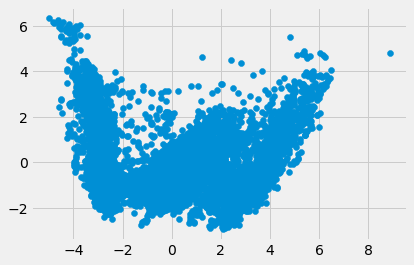

In [16]:
plt.scatter(df2[:, 0], df2[:, 1])

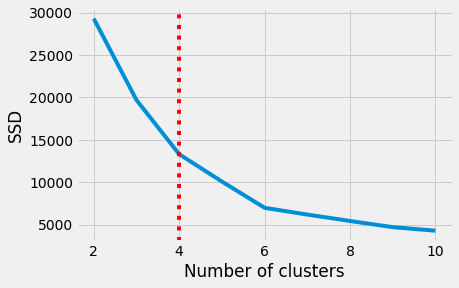

In [17]:
from sklearn.cluster import KMeans
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df2)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
ax = plt.axes()
ax.plot(temp[0], temp[1]) # plot the SSDs for each n_clusters
ax.axvline(4, ls='dotted',color='red') # elbow formed as 4
plt.xlabel('Number of clusters')
plt.ylabel('SSD')
plt.show()

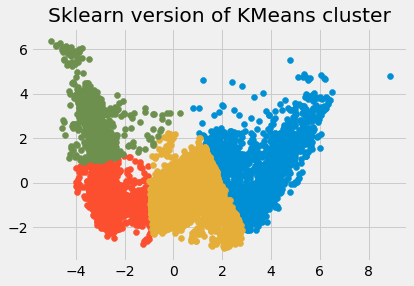

In [18]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 4)
yhat = model.fit_predict(df2)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
    plt.title("Sklearn version of KMeans cluster")
    plt.style.use('fivethirtyeight')

In [19]:
mydict = {i: np.where(model.labels_ == i)[0] for i in range(model.n_clusters)}

# Transform this dictionary into list (if you need a list as result)
dictlist = []
for key, value in mydict.items():
    temp = [key, value]
    dictlist.append(temp)

In [20]:
dictlist[0]

[0, array([   0,    1,    2, ..., 7380, 7381, 7383], dtype=int32)]

In [21]:
df3 = df.values

In [22]:
## To get items from the original dataset
accessed_mapping = map(df3.__getitem__, dictlist[0])
cl1 = list(accessed_mapping)
cluster_1 = pd.DataFrame(cl1[1], columns = ["AT","AP","AH","AFDP","GTEP","TIT","TAT","TEY","CDP","CO","NOX"])

accessed_mapping = map(df3.__getitem__, dictlist[1])
cl2 = list(accessed_mapping)
cluster_2 = pd.DataFrame(cl2[1], columns  = ["AT","AP","AH","AFDP","GTEP","TIT","TAT","TEY","CDP","CO","NOX"])

accessed_mapping = map(df3.__getitem__, dictlist[2])
cl3 = list(accessed_mapping)
cluster_3 = pd.DataFrame(cl3[1], columns = ["AT","AP","AH","AFDP","GTEP","TIT","TAT","TEY","CDP","CO","NOX"])

accessed_mapping = map(df3.__getitem__, dictlist[3])
cl4 = list(accessed_mapping)
cluster_4 = pd.DataFrame(cl4[1], columns = ["AT","AP","AH","AFDP","GTEP","TIT","TAT","TEY","CDP","CO","NOX"])

In [23]:
print("*" * 75)
print("The Average of AT in cluster 1 is:")
print(cluster_1.AT.mean())
print("*" * 75)
print("The Average CO in category 1 is:")
print(cluster_1["CO"].mean())
print("*" * 75)
print("The Average of NOX in category 1 is:")
print(cluster_1["NOX"].mean())
print("*" * 75)

***************************************************************************
The Average of AT in cluster 1 is:
10.98201817819315
***************************************************************************
The Average CO in category 1 is:
5.984899190031155
***************************************************************************
The Average of NOX in category 1 is:
72.30479003115268
***************************************************************************


In [24]:
## Final Report of Cluster 2

print("*" * 75)
print("The Average of AT in cluster 2 is:")
print(cluster_2.AT.mean())
print("*" * 75)
print("The Average CO in category 2 is:")
print(cluster_2["CO"].mean())
print("*" * 75)
print("The Average of NOX in category 2 is:")
print(cluster_2["NOX"].mean())
print("*" * 75)

***************************************************************************
The Average of AT in cluster 2 is:
25.501158163265256
***************************************************************************
The Average CO in category 2 is:
1.6489095867346917
***************************************************************************
The Average of NOX in category 2 is:
53.900784183673615
***************************************************************************


In [25]:
## Final Report of Cluster 3

print("*" * 75)
print("The Average of AT in cluster 3 is:")
print(cluster_3.AT.mean())
print("*" * 75)
print("The Average CO in category 3 is:")
print(cluster_3["CO"].mean())
print("*" * 75)
print("The Average of NOX in category 3 is:")
print(cluster_3["NOX"].mean())
print("*" * 75)

***************************************************************************
The Average of AT in cluster 3 is:
17.311147074038153
***************************************************************************
The Average CO in category 3 is:
2.748074736501782
***************************************************************************
The Average of NOX in category 3 is:
58.07583511154211
***************************************************************************


In [26]:
## Final Report of Cluster 4

print("*" * 75)
print("The Average of AT in cluster 4 is:")
print(cluster_4.AT.mean())
print("*" * 75)
print("The Average CO in category 4 is:")
print(cluster_4["CO"].mean())
print("*" * 75)
print("The Average of NOX in category 4 is:")
print(cluster_4["NOX"].mean())
print("*" * 75)

***************************************************************************
The Average of AT in cluster 4 is:
8.318908443526166
***************************************************************************
The Average CO in category 4 is:
2.4440662121212093
***************************************************************************
The Average of NOX in category 4 is:
56.347436639118456
***************************************************************************


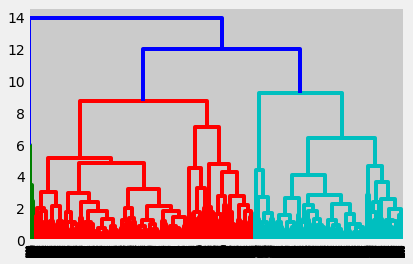

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage
mergings = linkage(df2, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()


#### From the dendrogram the optimal clusters are 4 (green line longest vertical distance)

In [ ]:
from sklearn.cluster import AffinityPropagation
d = [0.5,0.6,0.7,0.8,0.9]
for i in range(len(d)):
    v = d[i]
    print(v)
    model = AffinityPropagation(damping=v)
    model.fit(df2)
    yhat = model.predict(df2)
    clusters = unique(yhat)
    for cluster in clusters:
        row_ix = where(yhat == cluster)
        plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
        plt.title("Sklearn version of Affinity Propagation")
        plt.style.use('fivethirtyeight')
    plt.show()

#### Affinity Propagation doesnot work for this dataset Not working for large datset. Memory issue.

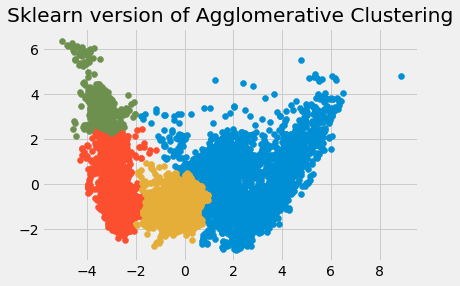

In [30]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4)
yhat = model.fit_predict(df2)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
    plt.title("Sklearn version of Agglomerative Clustering")
    plt.style.use('fivethirtyeight')

#### It performs well in this dataset.

0.17


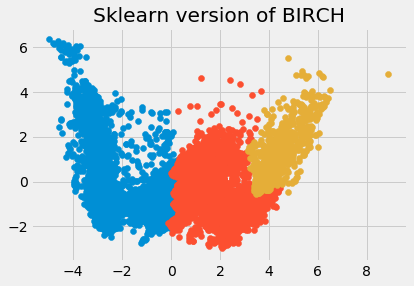

0.33


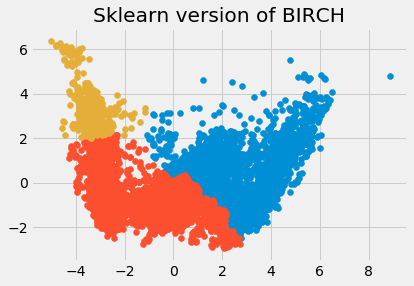

0.1


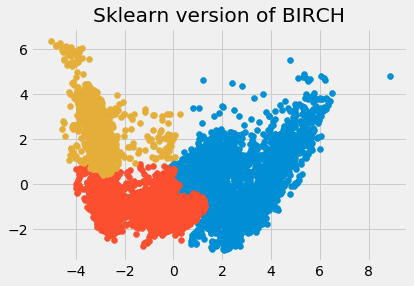

0.5


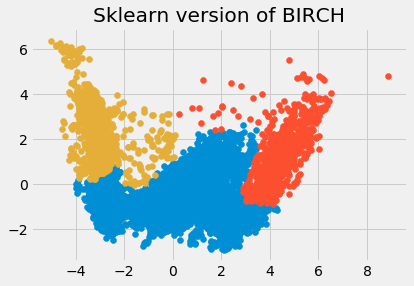

0.8


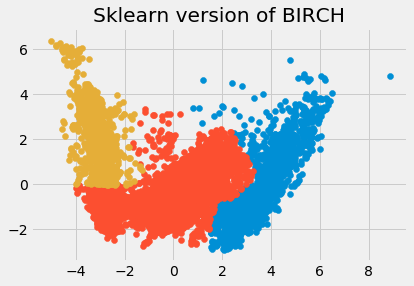

1


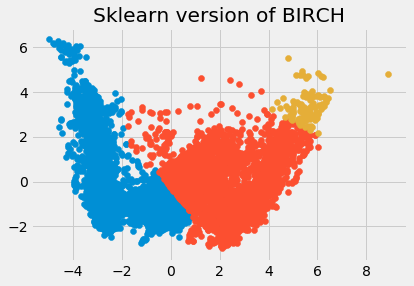

In [31]:
from sklearn.cluster import Birch
b = [0.17,0.33,0.1,0.5,0.8,1]
for i in range(len(b)):
    v = b[i]
    print(v)
    model = Birch(threshold=v)
    model.fit(df2)
    yhat = model.predict(df2)
    clusters = unique(yhat)
    for cluster in clusters:
        row_ix = where(yhat == cluster)
        plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
        plt.title("Sklearn version of BIRCH")
        plt.style.use('fivethirtyeight')
    plt.show()

#### Birch creates 3 clusters (optimal was 4). Perform better on 0.8 threshold

0.17


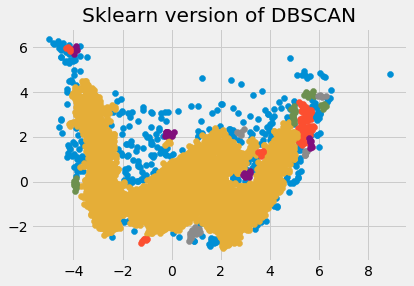

0.1


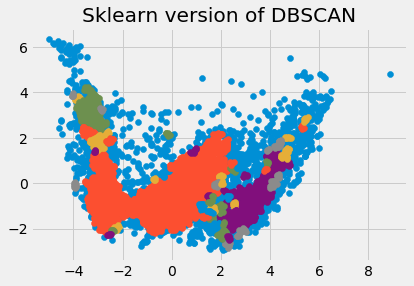

0.12


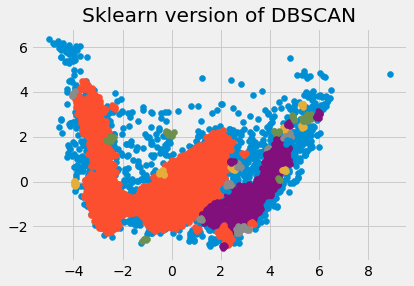

0.25


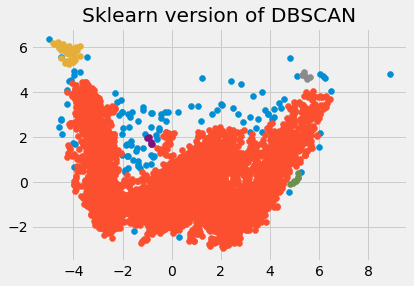

0.33


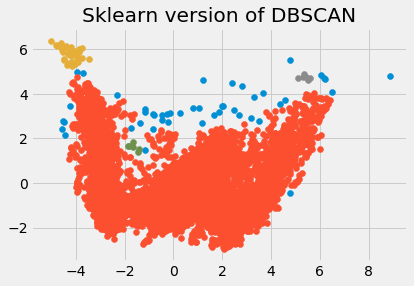

0.5


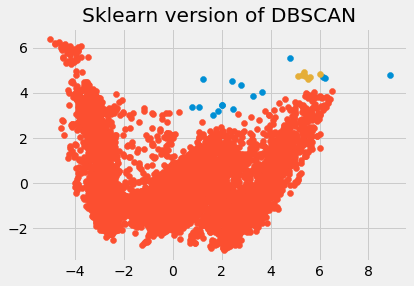

0.8


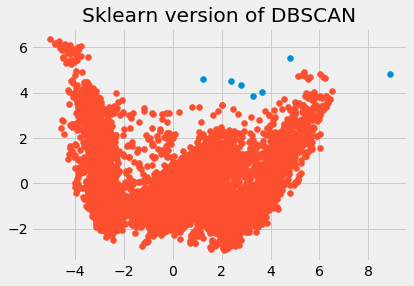

1


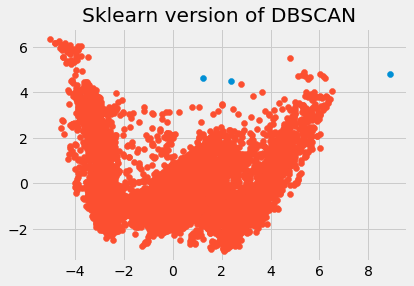

In [32]:
from sklearn.cluster import DBSCAN
b = [0.17,0.1,0.12,0.25,0.33,0.5,0.8,1]
for i in range(len(b)):
    v = b[i]
    print(v)
    model = DBSCAN(eps=v)
    yhat = model.fit_predict(df2)
    clusters = unique(yhat)
    for cluster in clusters:
        row_ix = where(yhat == cluster)
        plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
        plt.title("Sklearn version of DBSCAN")
        plt.style.use('fivethirtyeight')
    plt.show()

#### DBSCAN doesnot perform well on this dataset for all eps values

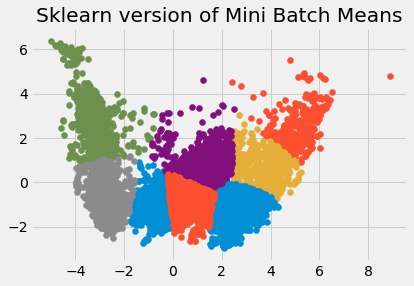

In [33]:
from sklearn.cluster import MiniBatchKMeans
model = MiniBatchKMeans()
model.fit(df2)
yhat = model.predict(df2)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
##plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], marker = '+', label='Clusters', c = "red")
    plt.title("Sklearn version of Mini Batch Means")
    plt.style.use('fivethirtyeight')

#### Minibatch creates 8 clusters not good (too much clusters)

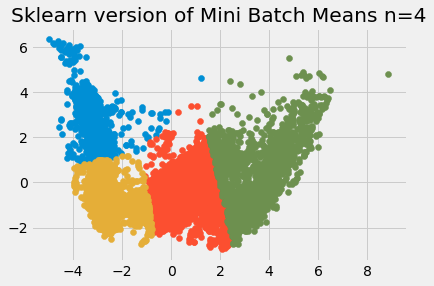

In [34]:
from sklearn.cluster import MiniBatchKMeans
model = MiniBatchKMeans(n_clusters=4)
model.fit(df2)
yhat = model.predict(df2)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
##plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], marker = '+', label='Clusters', c = "red")
    plt.title("Sklearn version of Mini Batch Means n=4")
    plt.style.use('fivethirtyeight')

0.17


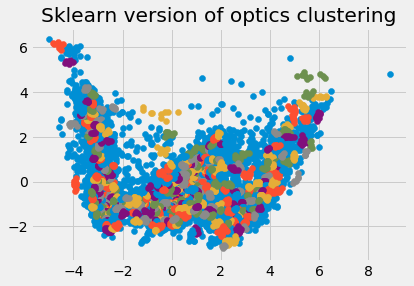

0.1


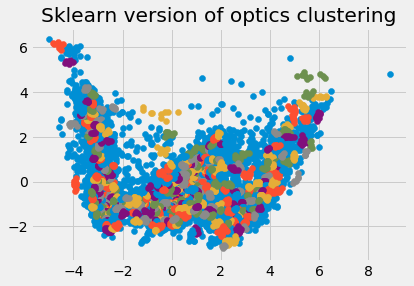

0.12


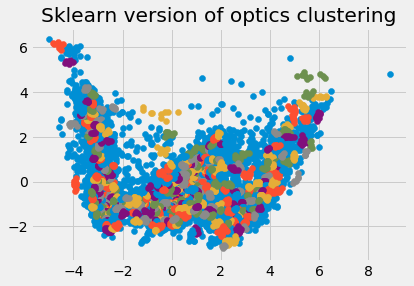

0.25


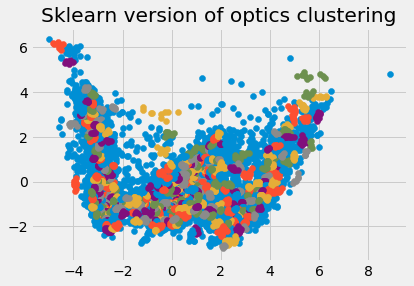

0.33


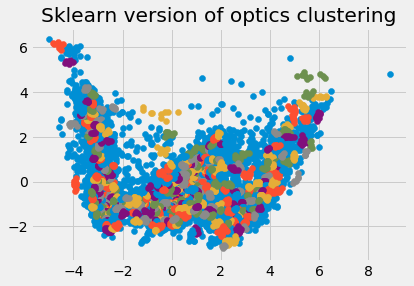

0.5


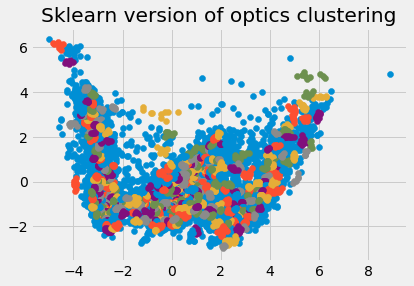

0.8


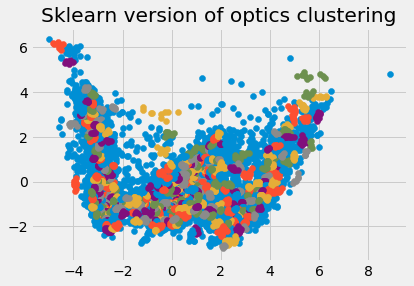

1


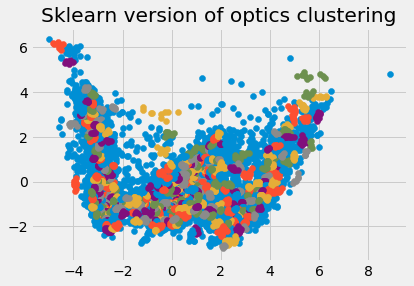

In [35]:
from sklearn.cluster import OPTICS
b = [0.17,0.1,0.12,0.25,0.33,0.5,0.8,1]
for i in range(len(b)):
    v = b[i]
    print(v)
    model = OPTICS(eps=v)
    yhat = model.fit_predict(df2)
    clusters = unique(yhat)
    for cluster in clusters:
        row_ix = where(yhat == cluster)
        plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
        plt.title("Sklearn version of optics clustering")
        plt.style.use('fivethirtyeight')
    plt.show()

#### Optics performs worst on this dataset for all eps values

In [ ]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering()
yhat = model.fit_predict(df2)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
    plt.title("Sklearn version of Spectral clustering")
    plt.style.use('fivethirtyeight')

#### Spectral not worked memory error

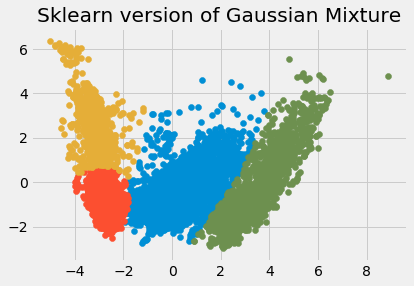

In [39]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components = 4)
yhat = model.fit_predict(df2)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
    plt.title("Sklearn version of Gaussian Mixture")
    plt.style.use('fivethirtyeight')

#### GMM perform good for this dataset

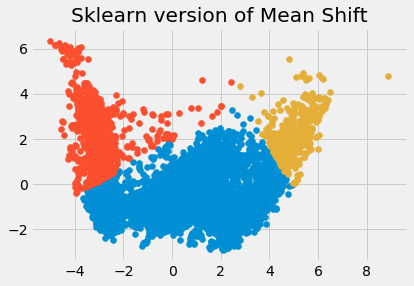

In [38]:
from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(df2, quantile=0.2, n_samples=500)
model = MeanShift(bandwidth=bandwidth)
model.fit(df2)
yhat = model.fit_predict(df2)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
    plt.title("Sklearn version of Mean Shift")
    plt.style.use('fivethirtyeight')

#### Mean shift creates 3 clusters (optimal 4 clusters). Average performance.